In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
dftrain = pd.read_excel('/media/jainish/2.0TB/GitHub/old-car-price-prediction/Data_Train (1).xlsx')
df_train=dftrain.copy()
dftrain.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Columns present in the dataframe.

In [7]:
dftrain.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

Number of rows and columns in the dataframe.

In [8]:
dftrain.shape

(6019, 12)

So, the dataframe train has 6019 rows and 12 columns.

Now, Let's divide the dataframe into two dataframes :
numF - containing all the numerical features
catF - containing all the categorial features

In [9]:
numF=dftrain.select_dtypes(include=[np.number])
numF.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [10]:
catF=dftrain.select_dtypes(include=[np.object])
catF.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


**Categorial Data Analysis**

Now, First we'll analyse the categorial data. In the categorial dataframe, first let's analyse Name.

Since the Name of the car would not help in estimating the price but the Company name would. So, we'll extract the company name from the name of the car.

In [11]:
dftrain['Name'].unique().size

1876

So, there are 1876 unique names in the dataframe.

Now, we'll split the Name column into sub-strings and pick the first substring as the name of the company since all car names start with their company names.

In [12]:
t=dftrain['Name'].str.split()
compName=t.str[0]
dftrain['Comp_Name']=pd.Series(compName)
dftrain.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


Let's check whether we have got all the names correct.

In [13]:
catF.insert(column='Comp_Name',value=compName,loc=1)
catF['Comp_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Observations:



1.   We don't know company names like Land, Force and Mini.
2.   Company names like Isuzu appear twice.

So, Let's fix that.

In [14]:
cn=catF['Comp_Name'].values
cn

array(['Maruti', 'Hyundai', 'Honda', ..., 'Mahindra', 'Maruti',
       'Chevrolet'], dtype=object)

In [15]:
dftrain.loc[dftrain['Comp_Name']=='Land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,Land
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,44.00,Land
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,30.00,Land
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,53.83,Land
410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,29.67,Land
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,33.50,Land
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,45.64,Land
701,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,16.50,Land


In [16]:
for i in range(dftrain.shape[0]):
  if (cn[i]=='Land'):
    cn[i]='Land Rover'
  if (cn[i]=='ISUZU'):
    cn[i]='Isuzu'
  if (cn[i]=='Mini'):
    cn[i]='Mini Cooper'
  if (cn[i]=='Force'):
    cn[i]='Force One LX'

In [17]:
dftrain=dftrain.drop('Comp_Name',axis=1)
catF=catF.drop('Comp_Name',axis=1)

In [18]:
dftrain.insert(column='Comp_Name',value=cn,loc=1)
catF.insert(column='Comp_Name',value=cn,loc=1)

Now that we have extracted the Company names , let's analyse it.

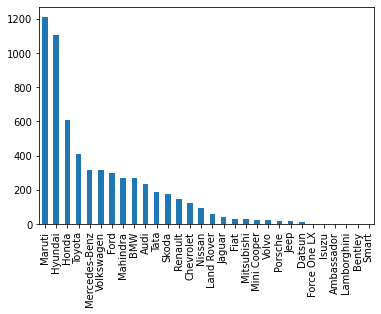

In [19]:
dftrain['Comp_Name'].value_counts().plot(kind='bar')

/home/jainish/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


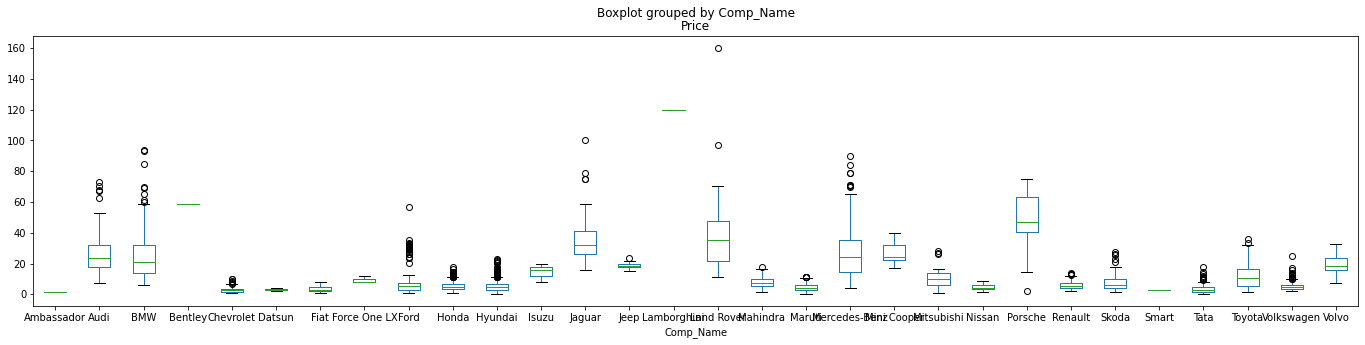

In [20]:
dftrain.boxplot(by ='Comp_Name', column =['Price'], grid = False ,figsize=(23,5)) 


Observations from above three plots: 
1. Companies like Maruti and Hyundai produce a large amount of cars with prices on the cheaper side (mostly under 10 lakhs). 
2. Companies like Bentley and Lamborghini produce very few amount of cars but the prices are very high (approx 1.2 cr for Lamborghini and 60 lakhs for Bentley). 
3. Other companies like Land Rover, Jaguar and Porsche produce more cars compared to Lamborghini and Bentley but the prices remain high (for Land Rover as high as 1.6 cr , for Jaguar upto 1 cr and for Porsche upto 80 lakhs)

Now, Let's analyse Locations.

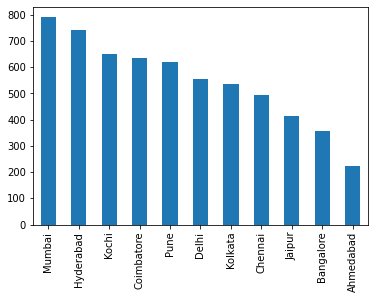

In [21]:
dftrain['Location'].value_counts().plot(kind='bar')

/home/jainish/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


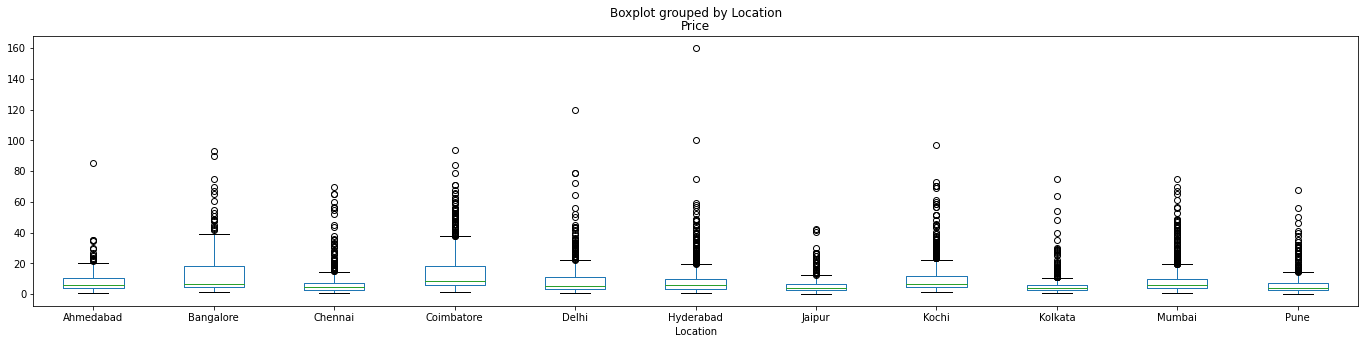

In [22]:
dftrain.boxplot(by ='Location', column =['Price'], grid = False ,figsize=(23,5)) 


Observations: 
1. Hyderabad and Mumbai produce the most amount of cars. 
2. Coimbatore and Banglore have the most expensive cars whereas Jaipur and Kolkata have the cheapest ones.

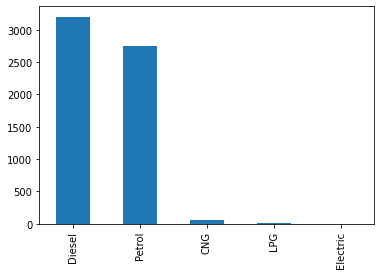

In [23]:
dftrain['Fuel_Type'].value_counts().plot(kind='bar')

<BarContainer object of 6019 artists>

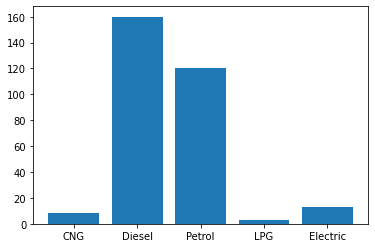

In [24]:
plt.bar('Fuel_Type','Price',data=dftrain)

/home/jainish/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


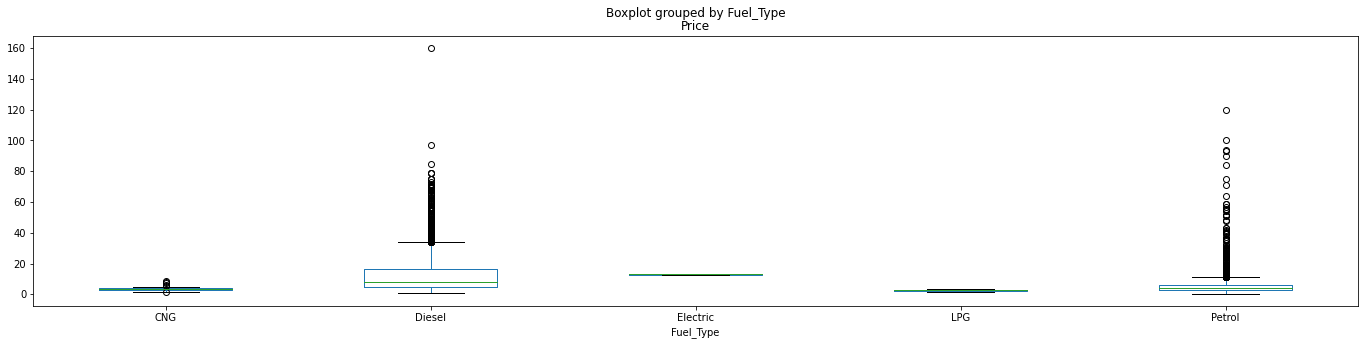

In [25]:
dftrain.boxplot(by ='Fuel_Type', column =['Price'], grid = False ,figsize=(23,5)) 


Observations:
1. Almost all cars are either Diesel or Petrol cars with number of Diesel cars slightly leading.
2. Price of Diesel are the highest and LPG cars the cheapest.

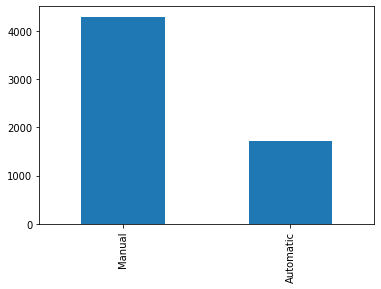

In [26]:
dftrain['Transmission'].value_counts().plot(kind='bar')

<BarContainer object of 6019 artists>

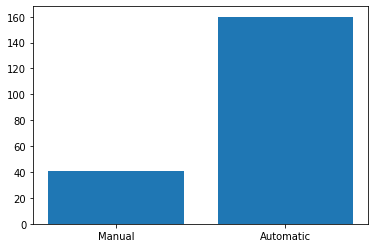

In [27]:
plt.bar('Transmission','Price',data=dftrain)

/home/jainish/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


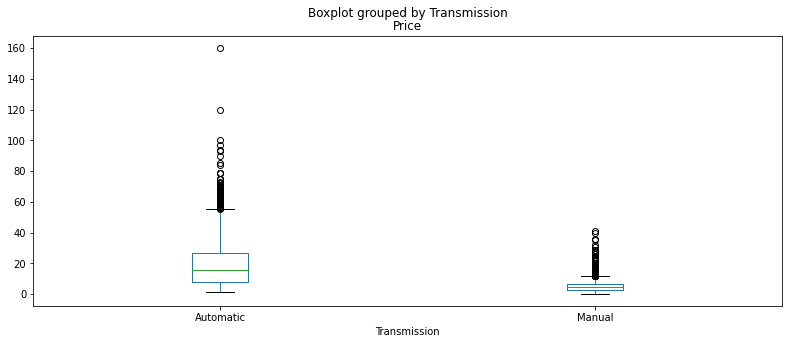

In [28]:
dftrain.boxplot(by ='Transmission', column =['Price'], grid = False ,figsize=(13,5)) 


Observations: 
1. Manual cars are much larger in number than Automatic cars. 
2. Price of Automatic cars are much higher than Manual Cars.

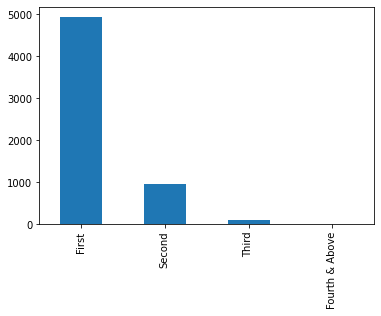

In [29]:
dftrain['Owner_Type'].value_counts().plot(kind='bar')

<BarContainer object of 6019 artists>

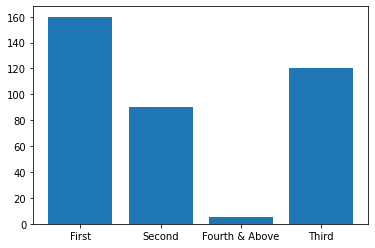

In [30]:
plt.bar('Owner_Type','Price',data=dftrain)

/home/jainish/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


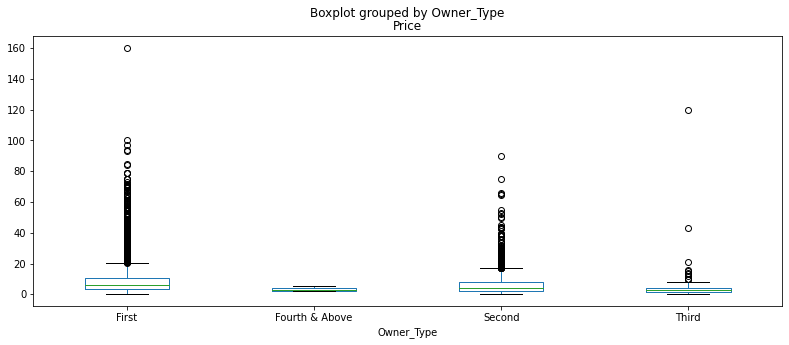

In [31]:
dftrain.boxplot(by ='Owner_Type', column =['Price'], grid = False ,figsize=(13,5)) 


Observations: Most cars are first hand which are also the most expensive.

Now, let's analyse Mileage.

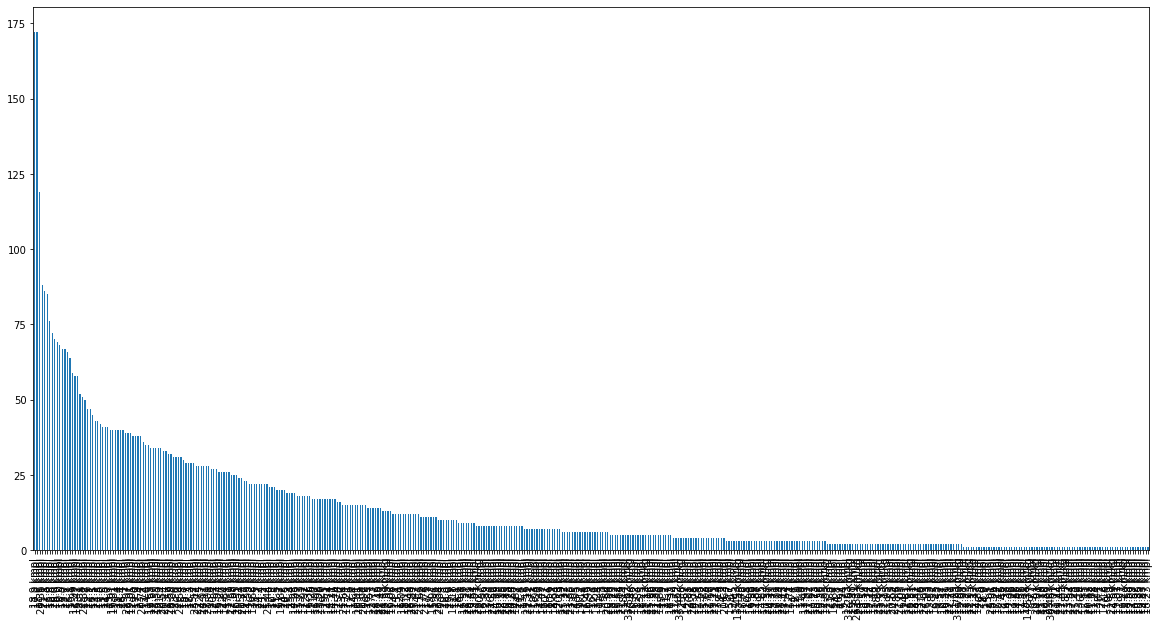

In [32]:
dftrain['Mileage'].value_counts().plot(kind='bar',figsize=(20,10))

In [33]:
dftrain['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

We can't make a definite conclusion from the above plot since Mileage is a numerical features stored as a categorial feature.

In [34]:
t=dftrain['Mileage'].str.split()
mylg=t.str[0]
mylgCount=t.str[1]
mylgCount.value_counts()

kmpl     5951
km/kg      66
Name: Mileage, dtype: int64

In [35]:
dftrain.insert(column='Mileage_Num',value=mylg,loc=8)
dftrain.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [36]:
numF.insert(column='Mileage_Num',value=mylg,loc=3)
numF

,Year,Kilometers_Driven,Seats,Mileage_Num,Price
0,2010,72000,5.0,26.6,1.75
1,2015,41000,5.0,19.67,12.50
2,2011,46000,5.0,18.2,4.50
3,2012,87000,7.0,20.77,6.00
4,2013,40670,5.0,15.2,17.74
...,...,...,...,...,...
6014,2014,27365,5.0,28.4,4.75
6015,2015,100000,5.0,24.4,4.00
6016,2012,55000,8.0,14.0,2.90
6017,2013,46000,5.0,18.9,2.65


Here, we have extracted Mileage_Num from Mileage and stored it as a numerical feature.

We do the same thing with features Engine, Power.

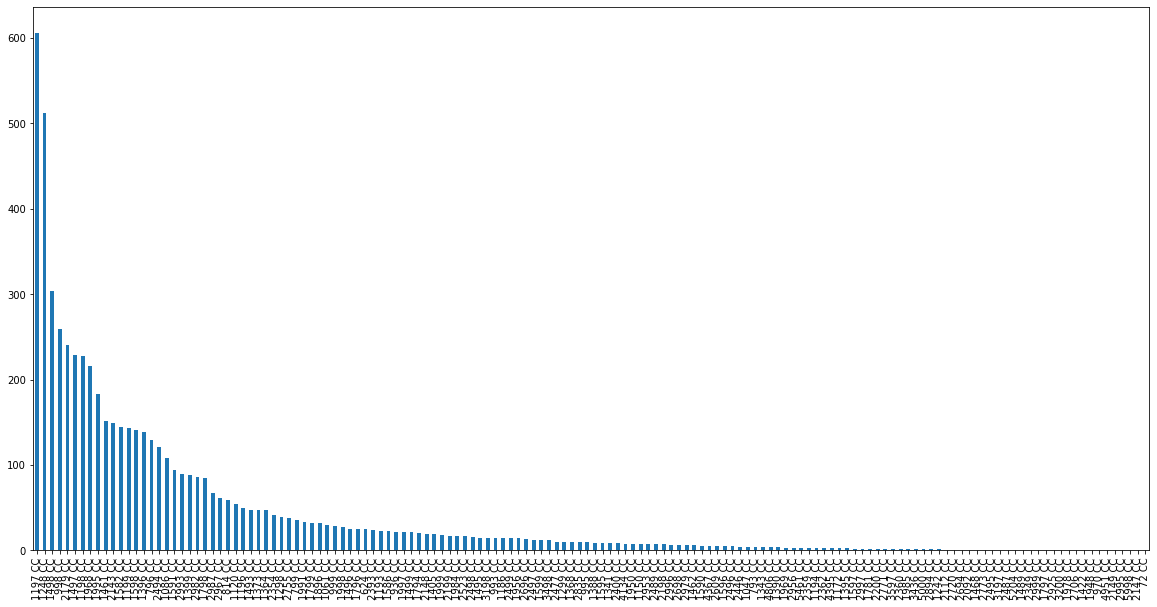

In [37]:
dftrain['Engine'].value_counts().plot(kind='bar',figsize=(20,10))

In [38]:
dftrain['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

We can't make a definite conclusion from the above plot since Mileage is a numerical features stored as a categorial feature.

In [39]:
t=dftrain['Engine'].str.split()
engNum=t.str[0]
dftrain.insert(column='Engine_Num',value=engNum,loc=10)
numF.insert(column='Engine_Num',value=engNum,loc=4)

In [40]:
dftrain.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8 bhp,5.0,17.74


In [41]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Price
0,2010,72000,5.0,26.6,998,1.75
1,2015,41000,5.0,19.67,1582,12.50
2,2011,46000,5.0,18.2,1199,4.50
3,2012,87000,7.0,20.77,1248,6.00
4,2013,40670,5.0,15.2,1968,17.74


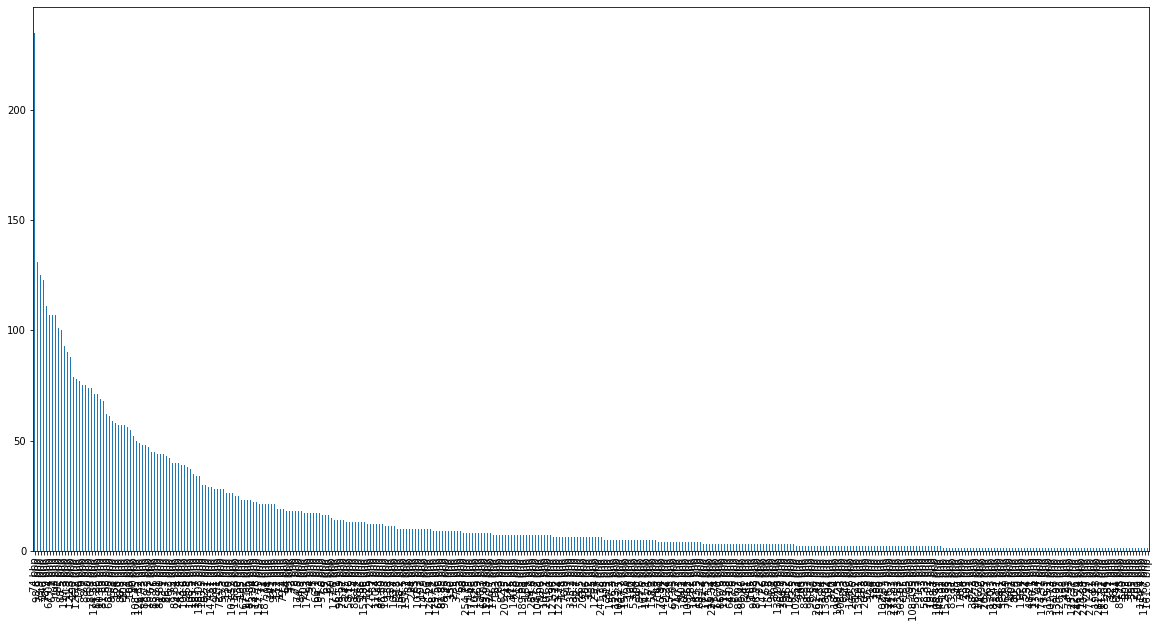

In [42]:
dftrain['Power'].value_counts().plot(kind='bar',figsize=(20,10))

In [43]:
dftrain['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [44]:
t=dftrain['Power'].str.split()
power=t.str[0]
dftrain.insert(column='Power_Num',value=power,loc=12)
numF.insert(column='Power_Num',value=power,loc=5)

In [45]:
dftrain.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8,140.8 bhp,5.0,17.74


In [46]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price
0,2010,72000,5.0,26.6,998,58.16,1.75
1,2015,41000,5.0,19.67,1582,126.2,12.50
2,2011,46000,5.0,18.2,1199,88.7,4.50
3,2012,87000,7.0,20.77,1248,88.76,6.00
4,2013,40670,5.0,15.2,1968,140.8,17.74


In [47]:
dftrain.isnull().sum()

Name                  0
Comp_Name             0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage_Num           2
Mileage               2
Engine_Num           36
Engine               36
Power_Num            36
Power                36
Seats                42
Price                 0
dtype: int64

In [48]:
dftrain=dftrain.fillna(0)
numF=numF.fillna(0)

In [49]:
dftrain.isnull().sum()

Name                 0
Comp_Name            0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_Num          0
Mileage              0
Engine_Num           0
Engine               0
Power_Num            0
Power                0
Seats                0
Price                0
dtype: int64

The numerical features extracted from the categorical features are still stored as strings, so we'll convert them to float values.

In [50]:
dftrain['Mileage_Num']=dftrain['Mileage_Num'].astype(float)
dftrain['Engine_Num']=dftrain['Engine_Num'].astype(float)

You can notice that one of the above line is commented. when we uncomment that line following error is displayed: ValueError: could not convert string to float: 'null' So, let's try to fix that.

For that, we'll first see which columns have the 'null' values. And then, equate them to 0.

In [51]:
dftrain.loc[dftrain['Power_Num']=='null']

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.80,17.8 kmpl,1399.0,1399 CC,null,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.00,0.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,1.20
5893,Maruti Estilo LXI,Maruti,Chennai,2008,51000,Petrol,Manual,Second,19.50,19.5 kmpl,1061.0,1061 CC,null,null bhp,0.0,1.75
5925,Skoda Laura Classic 1.8 TSI,Skoda,Pune,2010,85000,Petrol,Manual,First,17.50,17.5 kmpl,1798.0,1798 CC,null,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.00,0.0 kmpl,2112.0,2112 CC,null,null bhp,6.0,1.70


In [52]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price
76,2008,111111,5.0,17.8,1399,null,2.00
79,2005,87591,5.0,0.0,1086,null,1.30
89,2007,73745,5.0,17.0,1086,null,2.10
120,2005,102000,5.0,17.0,1086,null,0.85
143,2008,80759,5.0,17.0,1086,null,1.67
...,...,...,...,...,...,...,...
5873,2006,47200,5.0,17.0,1086,null,1.20
5893,2008,51000,0.0,19.5,1061,null,1.75
5925,2010,85000,5.0,17.5,1798,null,2.85
5943,2002,75000,6.0,0.0,2112,null,1.70


In [53]:
dftrain.loc[dftrain['Power_Num']=='null','Power_Num']=0
numF.loc[numF['Power_Num']=='null','Power_Num']=0
dftrain.loc[dftrain['Power_Num']=='null']

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,Price


In [54]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price


In [55]:
dftrain['Power_Num']=dftrain['Power_Num'].astype(float)

In [56]:
dftrain['Power_Num'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,   0.   , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [57]:
dftrain.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,26.6 km/kg,998.0,998 CC,58.16,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582.0,1582 CC,126.20,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,18.2 kmpl,1199.0,1199 CC,88.70,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248.0,1248 CC,88.76,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,15.2 kmpl,1968.0,1968 CC,140.80,140.8 bhp,5.0,17.74


In [58]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price
0,2010,72000,5.0,26.6,998,58.16,1.75
1,2015,41000,5.0,19.67,1582,126.2,12.50
2,2011,46000,5.0,18.2,1199,88.7,4.50
3,2012,87000,7.0,20.77,1248,88.76,6.00
4,2013,40670,5.0,15.2,1968,140.8,17.74


### Numerical Data Analysis
Let's check the corelation between various features of the dataset.

In [59]:
dftrain.corr()

,Year,Kilometers_Driven,Mileage_Num,Engine_Num,Power_Num,Seats,Price
Year,1.000000,-0.173048,0.320643,-0.030592,0.084728,0.060698,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064915,0.087549,0.022738,0.068683,-0.011493
Mileage_Num,0.320643,-0.064915,1.000000,-0.549938,-0.419891,-0.209828,-0.306191
Engine_Num,-0.030592,0.087549,-0.549938,1.000000,0.844788,0.429216,0.647232
Power_Num,0.084728,0.022738,-0.419891,0.844788,1.000000,0.170102,0.751724
Seats,0.060698,0.068683,-0.209828,0.429216,0.170102,1.000000,0.057656
Price,0.305327,-0.011493,-0.306191,0.647232,0.751724,0.057656,1.000000


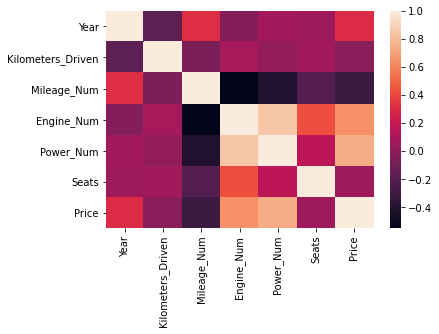

In [60]:
sns.heatmap(dftrain.corr())

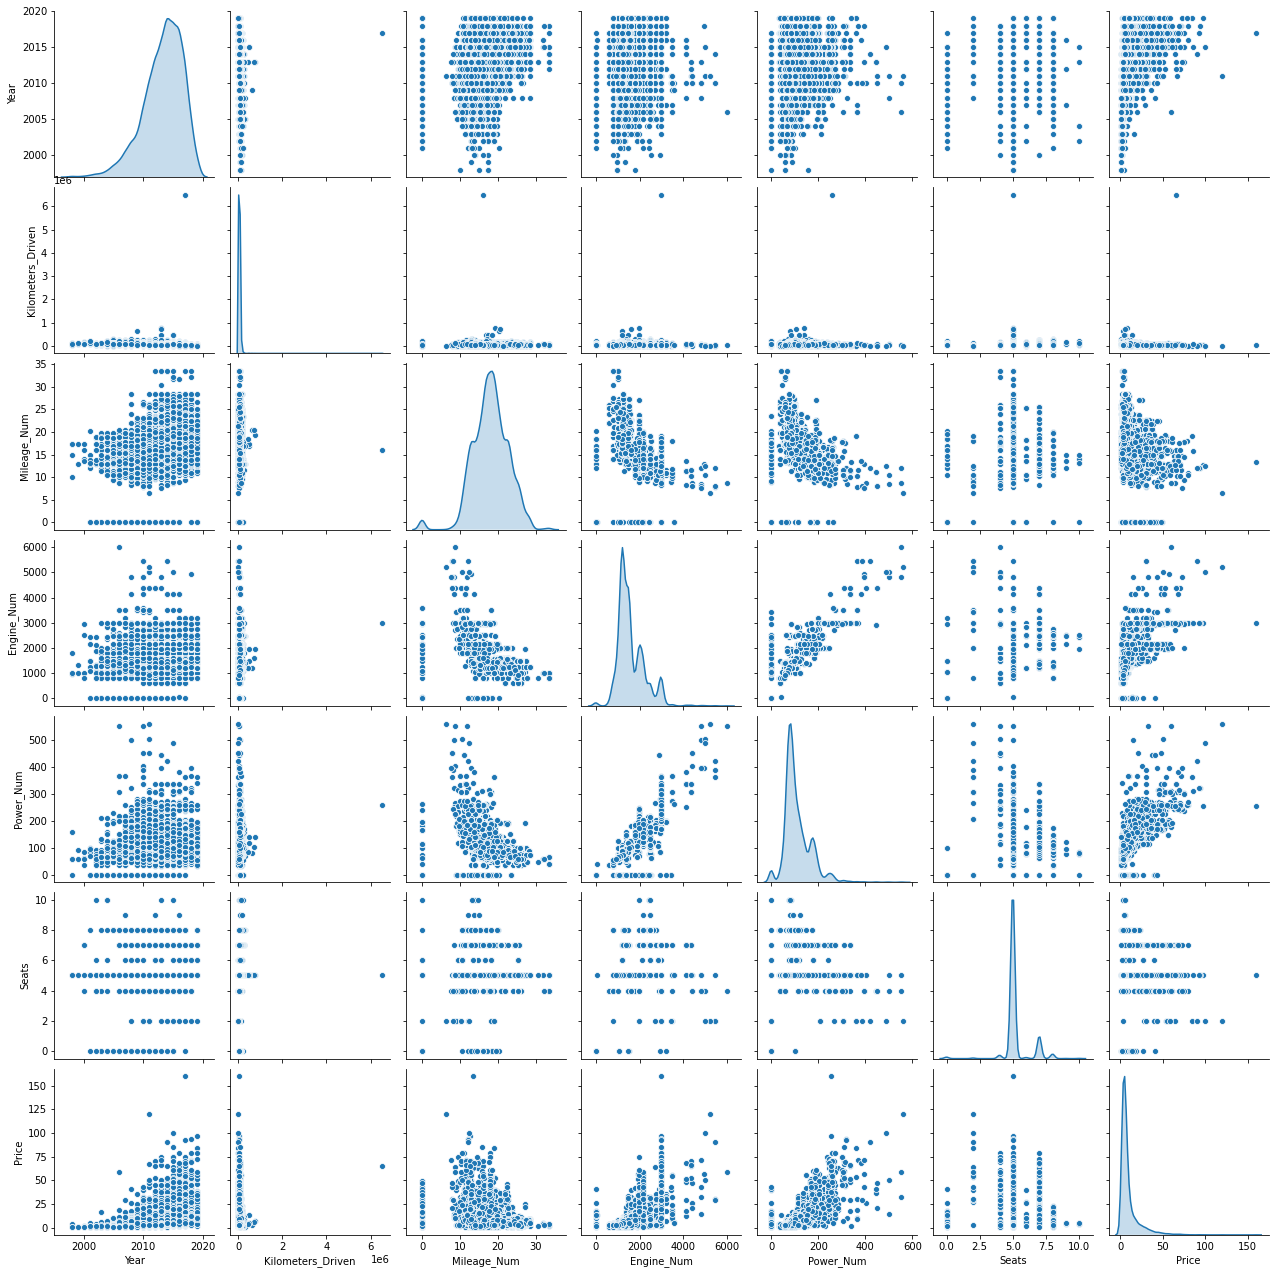

In [61]:
sns.pairplot(dftrain,diag_kind='kde',kind='scatter')

Observations: 
1. Year by year, cars are becoming more expensive. 
2. More is the power, better is the engine and more expensive is the car.

Now, let's analyse our target feature 'Price' and its relationship with all other numerical features.

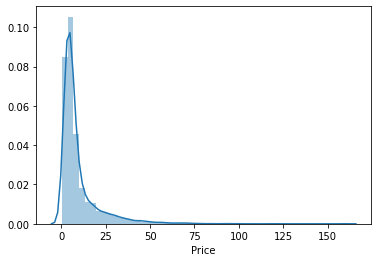

In [62]:
sns.distplot(dftrain['Price'])

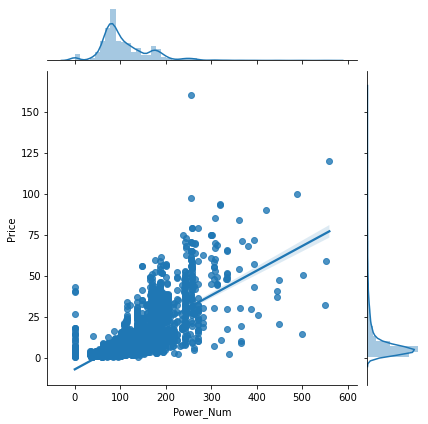

In [63]:
sns.jointplot(x='Power_Num',y='Price',data=dftrain,kind='reg')

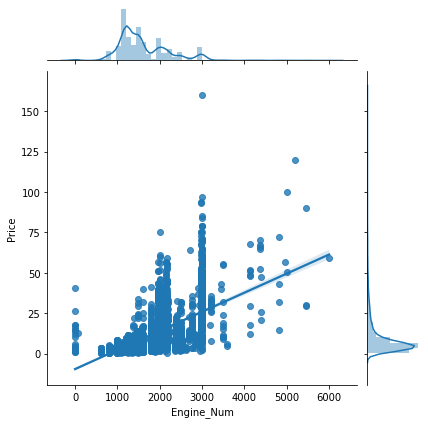

In [64]:
sns.jointplot('Engine_Num','Price',data=dftrain,kind='reg')

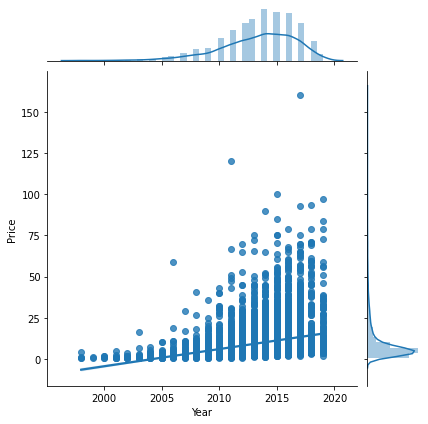

In [65]:
sns.jointplot('Year','Price',data=dftrain,kind='reg')

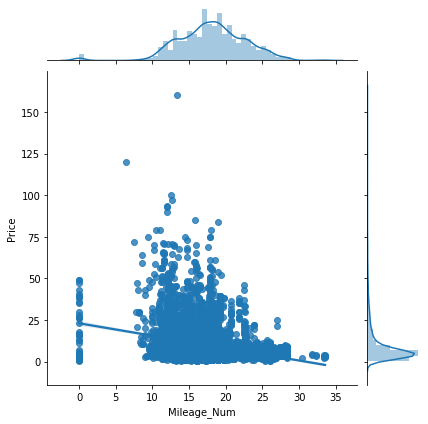

In [66]:
sns.jointplot('Mileage_Num','Price',data=dftrain,kind='reg')

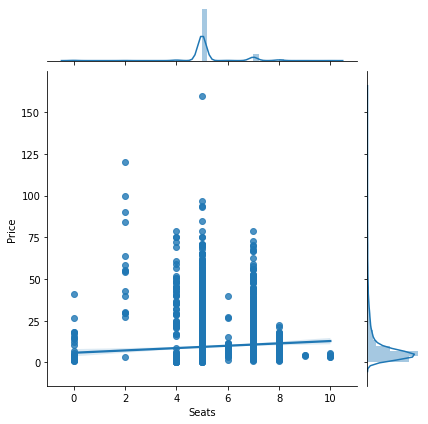

In [67]:
sns.jointplot('Seats','Price',data=dftrain,kind='reg')

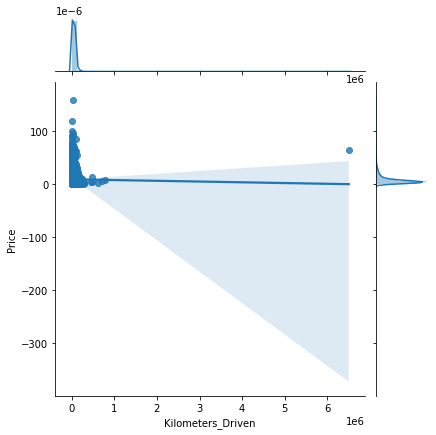

In [68]:
sns.jointplot('Kilometers_Driven','Price',data=dftrain,kind='reg')

Now,preparing our categorical features to be inserted into the LGBMRegressor model.

In [69]:
df_test = pd.read_excel('/media/jainish/2.0TB/GitHub/old-car-price-prediction/Data_Test (1).xlsx')

In [70]:
df_train.shape, df_test.shape

((6019, 12), (1234, 11))

In [71]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 1)

Now, Removing unwanted data from data set.

In [72]:
df_train = df_train[df_train['Kilometers_Driven'] < 700000]
df_train = df_train[df_train['Kilometers_Driven'] > 999]
df_train = df_train[df_train['Fuel_Type'] != 'Electric']
df_train = df_train[df_train['Name'] != 'Ambassador Classic Nova Diesel']
df_train = df_train[df_train['Name'] != 'Lamborghini Gallardo Coupe']
df_train = df_train[df_train['Name'] != 'Force One LX 4x4']
df_train = df_train[df_train['Name'] != 'Force One LX ABS 7 Seating']
df_train = df_train[df_train['Name'] != 'Smart Fortwo CDI AT']

In [73]:
df = df_train.append(df_test, ignore_index=True, sort=False)

In [74]:
df['Car_Age'] = 2019 - df['Year']

In [75]:

df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
df['Seats'] = df['Seats'].fillna(5)
df['Year'] = df['Year'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Car_Comp_Name'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
df['Engine'] = df.groupby(['Car_Comp_Name']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Car_Comp_Name']).transform(lambda x: x.fillna(x.median()))['Power']
df['Car_Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])


/home/jainish/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [76]:
agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
agg_df = df.groupby(['Car_Comp_Name']).agg(agg_func)
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df.reset_index(inplace=True)
    
df = pd.merge(df, agg_df, on='Car_Comp_Name', how='left')

In [77]:
df.drop(['Name','Car_Comp_Name','Car_Brand'], axis=1, inplace=True)
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)
train_df.shape, test_df.shape

/home/jainish/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((6006, 16), (1234, 15))

In [78]:
train_df['Price'] = np.log1p(train_df['Price'])
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

/home/jainish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Split dataset into random train and test subsets using train_test_split model.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4504, 15), (4504,), (1502, 15), (1502,))

In [80]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks

In [81]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/home/jainish/.local/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.170783
[200]	valid_0's rmse: 0.162267
[300]	valid_0's rmse: 0.159938
[400]	valid_0's rmse: 0.158606
[500]	valid_0's rmse: 0.15832
[600]	valid_0's rmse: 0.15804
Early stopping, best iteration is:
[616]	valid_0's rmse: 0.157899
RMSLE: 0.15789943790645775


Showning above Root Mean Squared Logarithmic Error

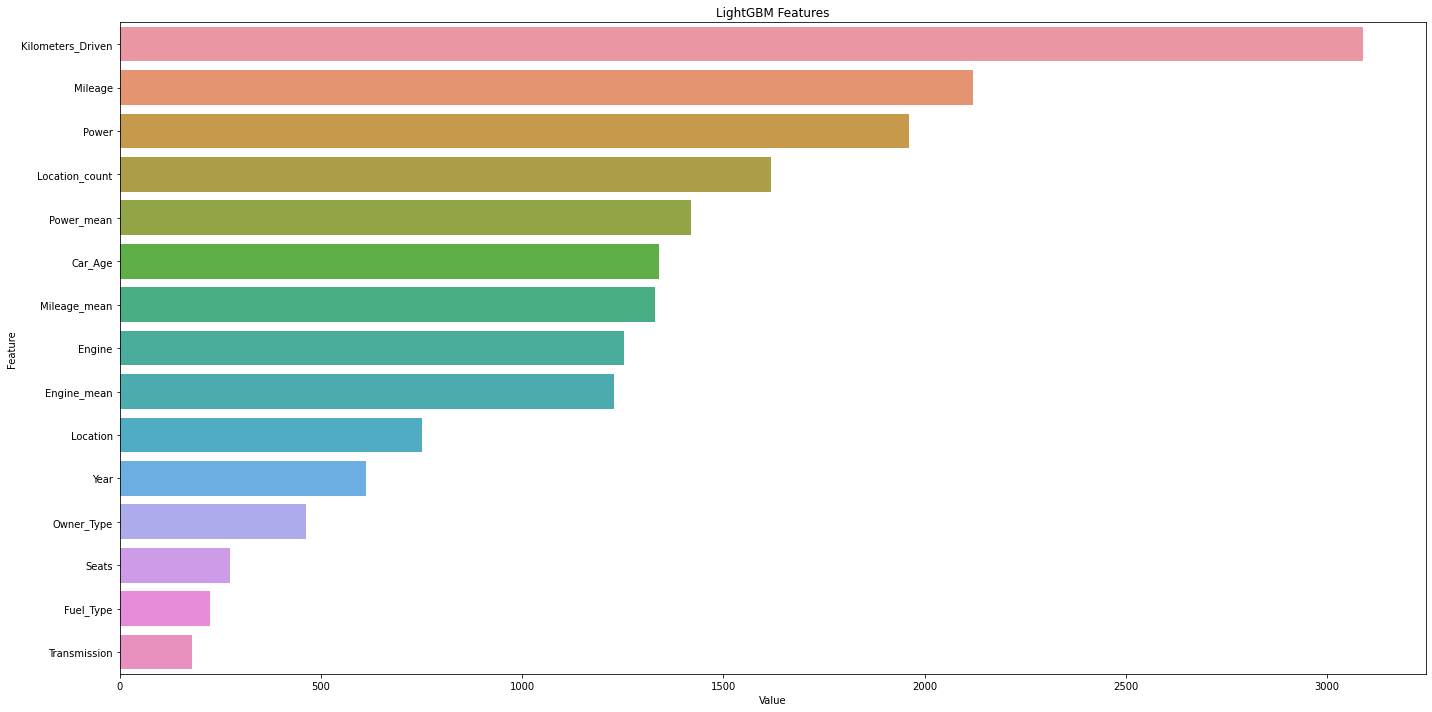

In [82]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [83]:
Xtest = test_df

LGBMRegressor Model

In [84]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

errlgb = []
errr2=[]
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    rmsle=sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm)))
    r2score=r2_score(y_test, y_pred_lgbm)
    print("RMSLE LGBM: ", rmsle,"\tR2 Score:",r2score)
    errlgb.append(rmsle)
    errr2.append(r2score)
    p = lgbm.predict(Xtest)
    
    y_pred_totlgb.append(p)

/home/jainish/.local/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
RMSLE LGBM:  0.13015637296762245 	R2 Score: 0.9691675345003079
/home/jainish/.local/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
RMSLE LGBM:  0.13587368435552072 	R2 Score: 0.9679302218129993
/home/jainish/.local/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
RMSLE LGBM:  0.11729910723640553 	R2 Score: 0.9740513148386475
/home/jainish/.local/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `n

Showing RMSLE and R2 Score

In [85]:
print("RMSLE: ",np.mean(errlgb) ,"\tR2: " ,np.mean(errr2))

RMSLE:  0.13551830325021264 	R2:  0.9658957801820622


In [86]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

In [90]:
df_sub = pd.DataFrame(data=lgbm_final, columns=['Price'])
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet', index=False)
writer.save()

In [91]:
df_sub.shape

(1234, 1)

In [92]:
df_sub.head()

,Price
0,2.727675
1,3.011059
2,16.507439
3,3.983041
4,4.670508
